## Demonstration of k-means of assumptions
Source: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

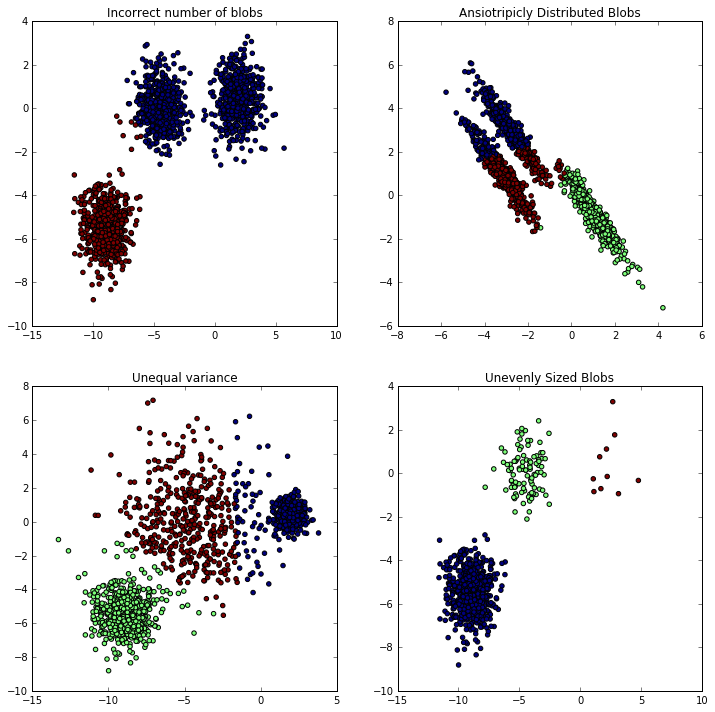

In [12]:
plt.figure(figsize=(12,12))

n_samples = 1500
random_state = 170
centers = 3
n_features = 2

X, y = make_blobs(n_samples = n_samples, centers = centers, 
                  n_features = n_features, random_state = random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.title("Incorrect number of blobs")


# Anisotopicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_ansio = np.dot(X, transformation)
y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_ansio)
plt.subplot(222)
plt.scatter(X_ansio[:,0], X_ansio[:, 1], c=y_pred)
plt.title("Ansiotripicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples = n_samples, n_features = n_features,
                               centers = centers, cluster_std = [1.0, 2.5, 0.5],
                               random_state=random_state)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:,0], X_varied[:,1], c= y_pred)
plt.title("Unequal variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## RBF SVM Parameters
Source: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

The best parameters are {'C': 10000000.0, 'gamma': 9.9999999999999995e-07} with a score of 0.97


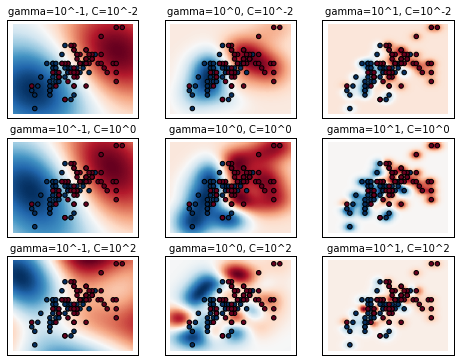

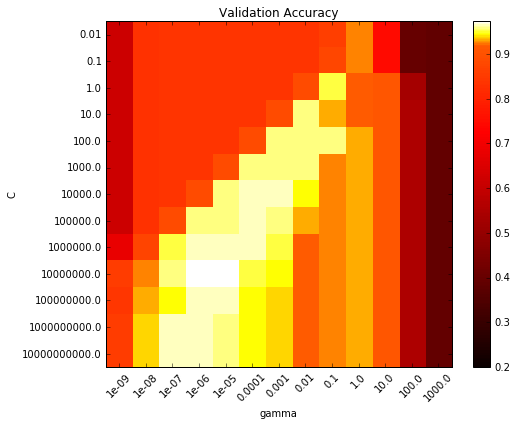

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

# Utility function to move the midpoint of a colormap to be around
# the values

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
        
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value,x,y))
    
iris = load_iris()    
X = iris.data
y = iris.target

X_2d = X[:, :2]
X_2d = X_2d[y>0] # Binary classification problem
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma = gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size = 0.2, random_state = 2016)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %.02f" % (grid.best_params_, grid.best_score_))

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# draw visualization of parameter effects
plt.figure(figsize=(8,6))
xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # Evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k+1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')
    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
        
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap = plt.cm.hot, 
           norm=MidpointNormalize(vmin=0.2, midpoint = 0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation Accuracy")
plt.show()